In [3]:
#The sns.set_style sets the aesthetics of the plot 
#%config InlineBackend figure_format = ‘retina’  makes the plot higher resolution. 
#%matplotlib inline is a magic function that tells Matplotlib to generate our plots within the frontend 
import pandas as pan
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Data Exploration
#reading csv file
file = pan.read_csv('blackFriday_train.csv')
file.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# first step is to clean the data and remove unnecessary columns
delete_col = ['Unnamed: 0','Marital_Status','City_Category','Stay_In_Current_City_Years']
file = file.drop(delete_col,axis = 1)
file.head()

,User_ID,Product_ID,Gender,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,8,NaN,NaN,7969


In [6]:
#Removing any duplicacy in rows
print(file.shape)
file = file.drop_duplicates(keep = 'first')
print(file.shape)

(550068, 9)
(550068, 9)


In [7]:
# replacing all the zeros from product_categort-1,2,3
col = ['Product_Category_1','Product_Category_2','Product_Category_3','Occupation']
file[col] = file[col].replace(0,npy.nan)
#dropping all the rows na in the columns in the list
file.dropna(subset = col , inplace = True)
file.shape
file.head()

,User_ID,Product_ID,Gender,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10.0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7.0,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20.0,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9.0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9.0,2,3.0,4.0,13055


In [8]:
# resetting index values
file = file.reset_index()
del file['index']


In [9]:
file.head()

,User_ID,Product_ID,Gender,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00248942,F,0-17,10.0,1,6.0,14.0,15200
1,1000004,P00184942,M,46-50,7.0,1,8.0,17.0,19215
2,1000005,P00145042,M,26-35,20.0,1,2.0,5.0,15665
3,1000006,P00231342,F,51-55,9.0,5,8.0,14.0,5378
4,1000006,P0096642,F,51-55,9.0,2,3.0,4.0,13055


In [10]:
#converting float64 to int64
file.Occupation = file.Occupation.astype(int)
file.Product_Category_2 = file.Product_Category_2.astype(int)
file.Product_Category_3 = file.Product_Category_3.astype(int)

In [11]:
#after cleaning the data looks like
file.head()

,User_ID,Product_ID,Gender,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00248942,F,0-17,10,1,6,14,15200
1,1000004,P00184942,M,46-50,7,1,8,17,19215
2,1000005,P00145042,M,26-35,20,1,2,5,15665
3,1000006,P00231342,F,51-55,9,5,8,14,5378
4,1000006,P0096642,F,51-55,9,2,3,4,13055


In [12]:
file.dtypes

User_ID                int64
Product_ID            object
Gender                object
Age                   object
Occupation             int32
Product_Category_1     int64
Product_Category_2     int32
Product_Category_3     int32
Purchase               int64
dtype: object

In [13]:
#1.findind max values in the list
maxvalues = file.max()
maxvalues

User_ID                1006040
Product_ID            P0099942
Gender                       M
Age                        55+
Occupation                  20
Product_Category_1          15
Product_Category_2          16
Product_Category_3          18
Purchase                 23958
dtype: object

In [14]:
#2.counting null values
print(file.isnull().sum())

User_ID               0
Product_ID            0
Gender                0
Age                   0
Occupation            0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64


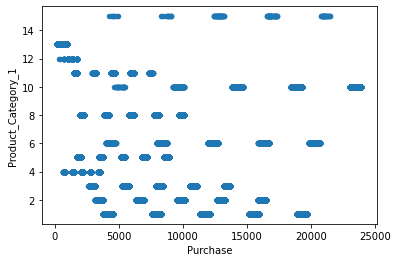

In [15]:
#data visualization
file.plot.scatter('Purchase','Product_Category_1')


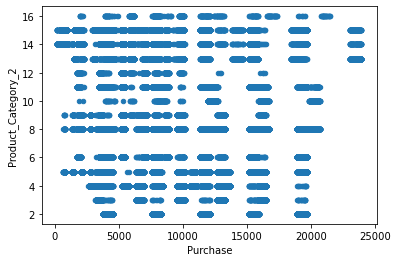

In [16]:
file.plot.scatter('Purchase','Product_Category_2')

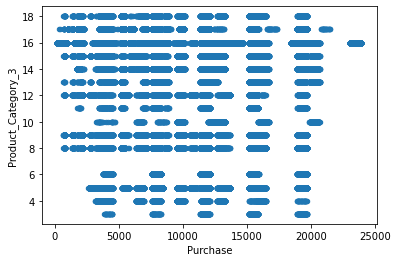

In [17]:
file.plot.scatter('Purchase','Product_Category_3')

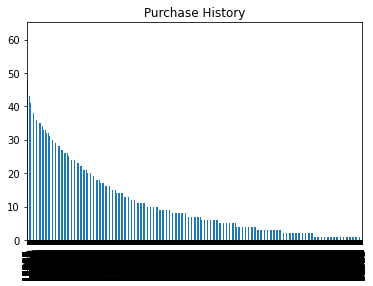

In [18]:
#The bar plot shows comparisons among these discrete categories

file['Purchase'].value_counts().plot.bar(title='Purchase History')

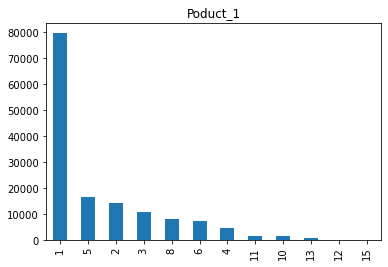

In [21]:
file['Product_Category_1'].value_counts().plot.bar(title='Poduct_1')

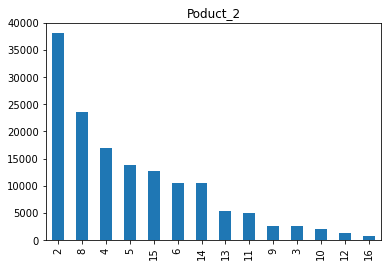

In [22]:
file['Product_Category_2'].value_counts().plot.bar(title='Poduct_2')

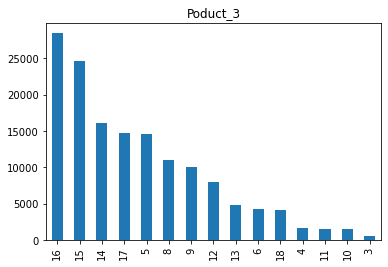

In [23]:
file['Product_Category_3'].value_counts().plot.bar(title='Poduct_3')

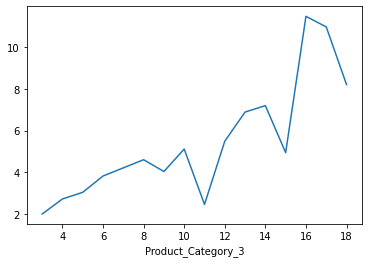

In [24]:
#counting different product_category_3 values
y = file.groupby('Product_Category_3') ['Product_Category_2'].mean().plot()
               

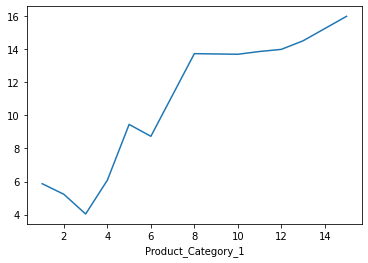

In [25]:
y = file.groupby('Product_Category_1') ['Product_Category_2'].mean().plot()

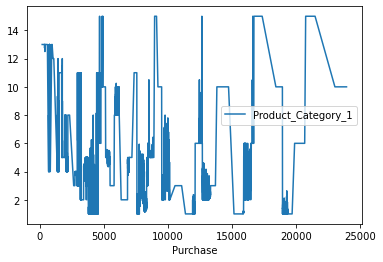

In [26]:
x = file.groupby("Purchase")[['Product_Category_1']].mean()
x.plot()

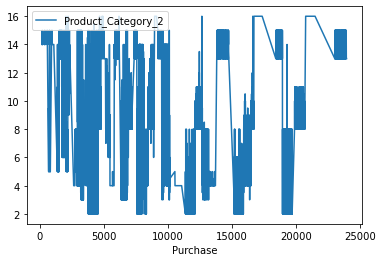

In [27]:
#finding median in the list
z = file.groupby("Purchase")[['Product_Category_2']].median()
z.plot()

In [28]:
#displacing mode values in the list
z = file['Purchase'].mode()
z

0    15879
dtype: int64

In [29]:
v = file['Product_Category_1'].mode()
v

0    1
dtype: int64

In [30]:
s = file['Product_Category_2'].mode()
s

0    2
dtype: int32

In [31]:
p = file['Product_Category_3'].mode()
p

0    16
dtype: int32